In [1]:
from modularity_based import *
from spectral import *
from statistical import *

import igraph as ig 
import networkx as nx

import pandas as pd 

%matplotlib inline

In [2]:
# Simple graph examples using igraph
ER = ig.Graph.Erdos_Renyi(n=100, p=0.5)
G1 = ig.Graph.Famous('Zachary')

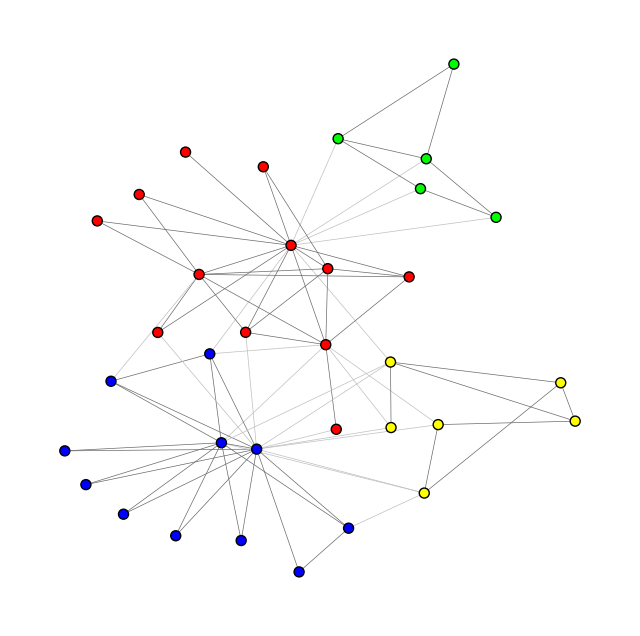

In [3]:
# Using only the igraph library
clusters_louv = louvain(G=G1, plot=True)

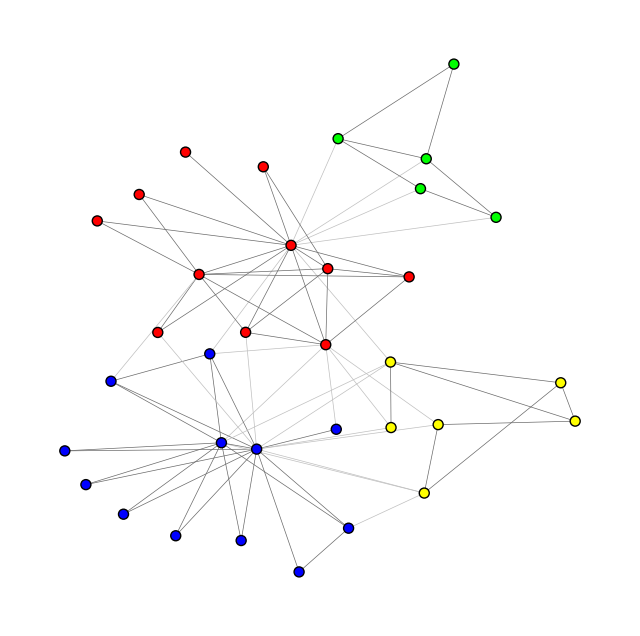

In [4]:
clusters_leid = leiden(G=G1, n=100, plot=True)

In [5]:
# Simple graph examples using networkx
G = nx.karate_club_graph() 

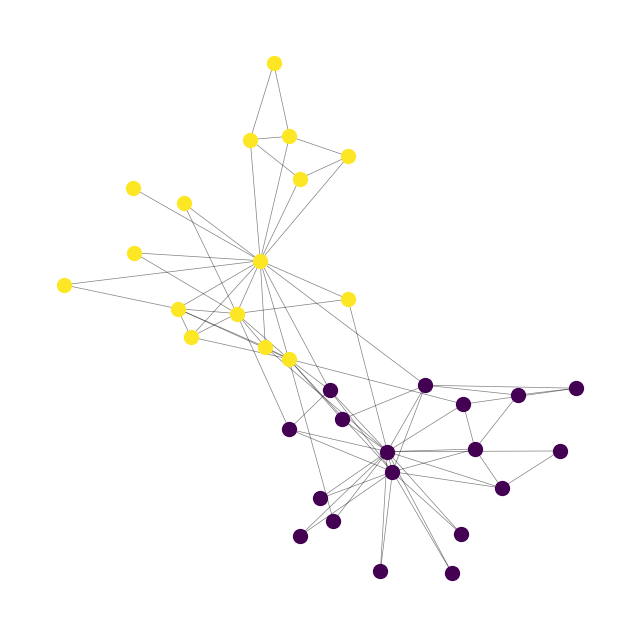

In [6]:
clusters_spec = spectral(G, 2, plot=True)

**--> Use CDlib to convert igraph object into networkx object and vice-versa**

--> Look more into CDlib for community-detection


In [7]:
## [OK] Implement Bayesian Inference
## [OK] Generate graph sbm fixer une des probas et varier l'autre pour comparer 
## [OK] adjusted_mutual_info_learn
## [OK] adjusted_rand_score
## matthews_corrcoefs --> GOOD FOR BINARY CLASSIFICATION...

In [8]:
import graph_tool.all as gt

In [9]:
#G = gt.random_graph(100, lambda: 0.5, directed=False)
G = gt.collection.data["karate"]
clusters = bayesianInf(G)

In [10]:
from graph_generation import *

In [11]:
sbm_graphs = sbm_generation(K=3, nb_probas=8)

In [12]:
from sklearn.metrics import adjusted_mutual_info_score

clusters_graphs = dict()
results = dict()  # Store the computed AMI scores

for key, graph in sbm_graphs.items():
    # Perform Bayesian inference
    clusters = bayesianInf(graph, seed=42)  # Extract clusters
    
    # Store the inferred clusters
    clusters_graphs[key] = clusters  # Use the string key, not the graph itself
    
    # Compute AMI score
    ind = adjusted_mutual_info_score(graph.vp["block"].a, clusters.a)
    results[key] = ind  # Store the score using the same key

# Print results
for key, score in results.items():
    print(f"{key}: Adjusted Mutual Information Score = {score:.4f}")

SBM_out_0: Adjusted Mutual Information Score = 0.7339
SBM_out_1: Adjusted Mutual Information Score = 0.6446
SBM_out_2: Adjusted Mutual Information Score = 0.6239
SBM_out_3: Adjusted Mutual Information Score = 0.7115
SBM_out_4: Adjusted Mutual Information Score = 0.7339
SBM_out_5: Adjusted Mutual Information Score = 0.6736
SBM_out_6: Adjusted Mutual Information Score = 0.7339
SBM_out_7: Adjusted Mutual Information Score = 0.6804


In [13]:
from validation import *

In [14]:
ind, avg_ind = compute_indexes(index="adjusted_mutual_info_score", algorithm="bayesian", graphs = sbm_graphs)

In [15]:
#results = validation(4, 20)

In [16]:
#print("Average scores for each algorithm and score function: ")
#display(results)

In [17]:
## No way to fix the number of found cluster in leiden and louvain using igraph...

In [18]:
range_K = np.linspace(5, 20, 5, dtype=np.int32)
print(range_K)

[ 5  8 12 16 20]


In [19]:
#results = validation_range_K(range_K, 20)

In [26]:
results = pd.read_csv("evaluations/scores_K5to20_n20", index_col=[0, 1])

In [27]:
display(results)

bayesian  spectral    leiden   louvain
K  Metric                                                            
5  adjusted_mutual_info_score  0.395066  0.068850  0.250518  0.257279
   adjusted_rand_score         0.186890  0.050288  0.225615  0.220771
   v_measure_score             0.389751  0.140029  0.339552  0.343972
8  adjusted_mutual_info_score  0.208060  0.113730  0.177271  0.189243
   adjusted_rand_score         0.084836  0.108704  0.121947  0.120841
   v_measure_score             0.293334  0.241439  0.260097  0.266783
12 adjusted_mutual_info_score  0.138619  0.084944  0.128380  0.117156
   adjusted_rand_score         0.061744  0.075470  0.075366  0.071769
   v_measure_score             0.266265  0.338328  0.259176  0.266222
16 adjusted_mutual_info_score  0.066344  0.067276  0.081322  0.082334
   adjusted_rand_score         0.037026  0.060232  0.043112  0.043186
   v_measure_score             0.257246  0.429085  0.264097  0.256301
20 adjusted_mutual_info_score  0.015360  0.028231  0.034617  0.038060
   adjusted_rand_score         0.009566  0.023750  0.020195  0.017702
   v_measure_score             0.276787  0.493471  0.267799  0.271718

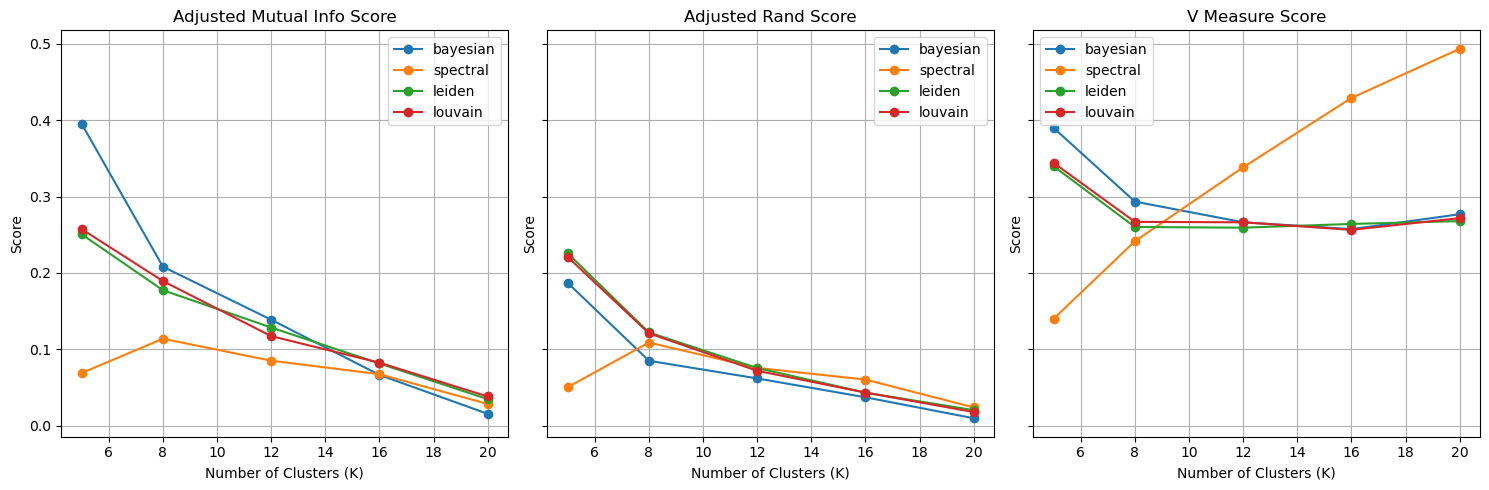

In [28]:
plot_results_range_K(results)